# The Image Classification Dataset

One of the widely used dataset for image classification is the MNIST dataset (LeCun et al., 1998) of handwritten digits. At the time of its release in the 1990s it posed a formidable challenge to most machine learning algorithms, consisting of 60,000 images of 28x28 pixels resolution (plus a test dataset of 10,000 images). To put things into perspective, at the time, a Sun SPARCStation 5 with a whopping 64MB of RAM and a blistering 5 MFLOPs was considered state of the art equipment for machine learning at AT&T Bell Laboratories in 1995. Achieving high accuracy on digit recognition was a key component in automating letter sorting for the USPS in the 1990s. Deep networks such as LeNet-5 (LeCun et al., 1995), support vector machines with invariances (Schölkopf et al., 1996), and tangent distance classifiers (Simard et al., 1998) all allowed to reach error rates below 1%.

For over a decade, MNIST served as the point of reference for comparing machine learning algorithms. While it had a good run as a benchmark dataset, even simple models by today’s standards achieve classification accuracy over 95%, making it unsuitable for distinguishing between stronger models and weaker ones. Even more so, the dataset allows for very high levels of accuracy, not typically seen in many classification problems. This skewed algorithmic development towards specific families of algorithms that can take advantage of clean datasets, such as active set methods and boundary-seeking active set algorithms. Today, MNIST serves as more of sanity checks than as a benchmark. ImageNet (Deng et al., 2009) poses a much more relevant challenge. Unfortunately, ImageNet is too large for many of the examples and illustrations in this book, as it would take too long to train to make the examples interactive. As a substitute we will focus our discussion in the coming sections on the qualitatively similar, but much smaller Fashion-MNIST dataset (Xiao et al., 2017), which was released in 2017. It contains images of 10 categories of clothing at 28x28 pixels resolution.

## Loading the Dataset

Since it is such a frequently used dataset, all major frameworks provide preprocessed versions of it. We can download and read the Fashion-MNIST dataset into memory using `MLDatasets.jl`.

In [1]:
using MLDatasets

ENV["DATADEPS_ALWAYS_ACCEPT"] = true
mnist_train = FashionMNIST(:train)
mnist_test = FashionMNIST(:test)

dataset FashionMNIST:
  metadata  =>    Dict{String, Any} with 4 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

Fashion-MNIST consists of images from 10 categories, each represented by 6,000 images in the training dataset and by 1,000 in the test dataset. A test dataset is used for evaluating model performance (it must not be used for training). Consequently the training set and the test set contain 60,000 and 10,000 images, respectively.

In [2]:
length(mnist_train), length(mnist_test)

(60000, 10000)

This is similar to the original MNIST dataset which consisted of (binary) black and white images. Note, though, that most modern image data which has 3 channels (red, green, blue) and hyperspectral images which can have in excess of 100 channels (the HyMap sensor has 126 channels). By convention we store image as a `h x w` array, `h` is the height and `w` is the width.

In [3]:
size(mnist_train.features[:,:,1])

(28, 28)

The categories of Fashion-MNIST have human-understandable names. The following code converts between numeric labels and their names.

In [4]:
class_name =  ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
get_fashion_mnist_labels(label::Int) = class_name[label+1]

get_fashion_mnist_labels (generic function with 1 method)

## Reading a Minibatch

To see how this works, let’s load a minibatch of images by invoking the `DataLoader` method. It contains 18 images.

In [5]:
using MLUtils
train_loader = DataLoader((mnist_train.features,mnist_train.targets),batchsize=64,shuffle=true)

938-element DataLoader(::Tuple{Array{Float32, 3}, Vector{Int64}}, shuffle=true, batchsize=64)
  with first element:
  (28×28×64 Array{Float32, 3}, 64-element Vector{Int64},)

Let’s look at the time it takes to read the images. Even though it is a built-in loader, it is not blazingly fast. Nonetheless, this is sufficient since processing images with a deep network takes quite a bit longer. Hence it is good enough that training a network will not be IO constrained.

In [6]:
@time for (X,y) in train_loader
end

  0.090352 seconds (23.06 k allocations: 182.540 MiB, 17.56% gc time, 15.25% compilation time)


## Visualization

We’ll be using the Fashion-MNIST dataset quite frequently. A convenience function show_images can be used to visualize the images and the associated labels.

In [7]:
using CairoMakie
using ImageShow

function show_images(features::Array{<:Real,3},targets::Vector{Int64})
    column_num = 9
    batch_num = size(features)[3]
    row_num = Int(ceil(batch_num / column_num))
    fig = Figure(resolution=(column_num*28*4,row_num*28*4))
    for (slice,label,i) in zip(eachslice(features,dims=3),targets,CartesianIndices((row_num,column_num)))
        image(fig[i[1],i[2]], rotr90(convert2image(FashionMNIST,slice)), axis = (aspect = DataAspect(), 
            title = "$(get_fashion_mnist_labels(label))",
            xticksvisible=false,xticklabelsvisible=false,yticksvisible=false,yticklabelsvisible=false))
    end
    fig
end

show_images (generic function with 1 method)

Let’s put it to good use. In general, it is a good idea to visualize and inspect data that you’re training on. Humans are very good at spotting unusual aspects and as such, visualization serves as an additional safeguard against mistakes and errors in the design of experiments. Here are the images and their corresponding labels (in text) for the first few examples in the training dataset.

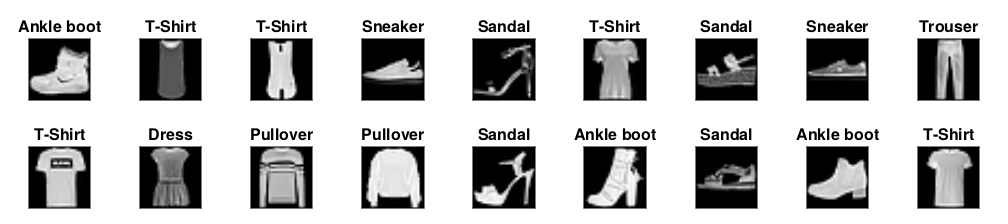

In [8]:
(features,targets) = first(DataLoader((mnist_train.features,mnist_train.targets),batchsize=18,shuffle=false))
show_images(features,targets)